# Load library and preprocessing

In [1]:
# import package
import arviz as az
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pymc as pm

In [2]:
# load dataset 
df = pd.read_csv('diabetes_imputed_CE.csv')

In [3]:
df = df.drop(df.columns[0], axis=1)
df.head(10) # head of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.00000,35.000000,208.169083,33.600000,0.627,50,1
1,1,85.0,66.00000,29.000000,157.620259,26.600000,0.351,31,0
2,8,183.0,64.00000,29.522514,146.807322,23.300000,0.672,32,1
3,1,89.0,66.00000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.00000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.00000,28.313905,131.672830,25.600000,0.201,30,0
6,3,78.0,50.00000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.55654,29.083141,113.938668,35.300000,0.134,29,0
8,2,197.0,70.00000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.00000,33.285207,213.104630,32.060241,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.670300,72.371121,29.199634,158.749804,32.456407,0.471876,33.240885,0.348958
std,3.369578,30.439049,12.116049,8.824640,88.954459,6.877164,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.209846,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.094191,144.264773,32.159336,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.287443,183.020372,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### It is impossible for variables such as Glucose, blood pressure, skin thickness, insulin and bmi to have values of 0. 
### Thus, it is possible that missing values are coded as 0 for those variables

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,208.169083,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,157.620259,26.6,0.351,31,0
2,8,183.0,64.0,29.522514,146.807322,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [7]:
df.isnull().sum() # now we see some missing values for the variables

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.670300,72.371121,29.199634,158.749804,32.456407,0.471876,33.240885,0.348958
std,3.369578,30.439049,12.116049,8.824640,88.954459,6.877164,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.209846,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.094191,144.264773,32.159336,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.287443,183.020372,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


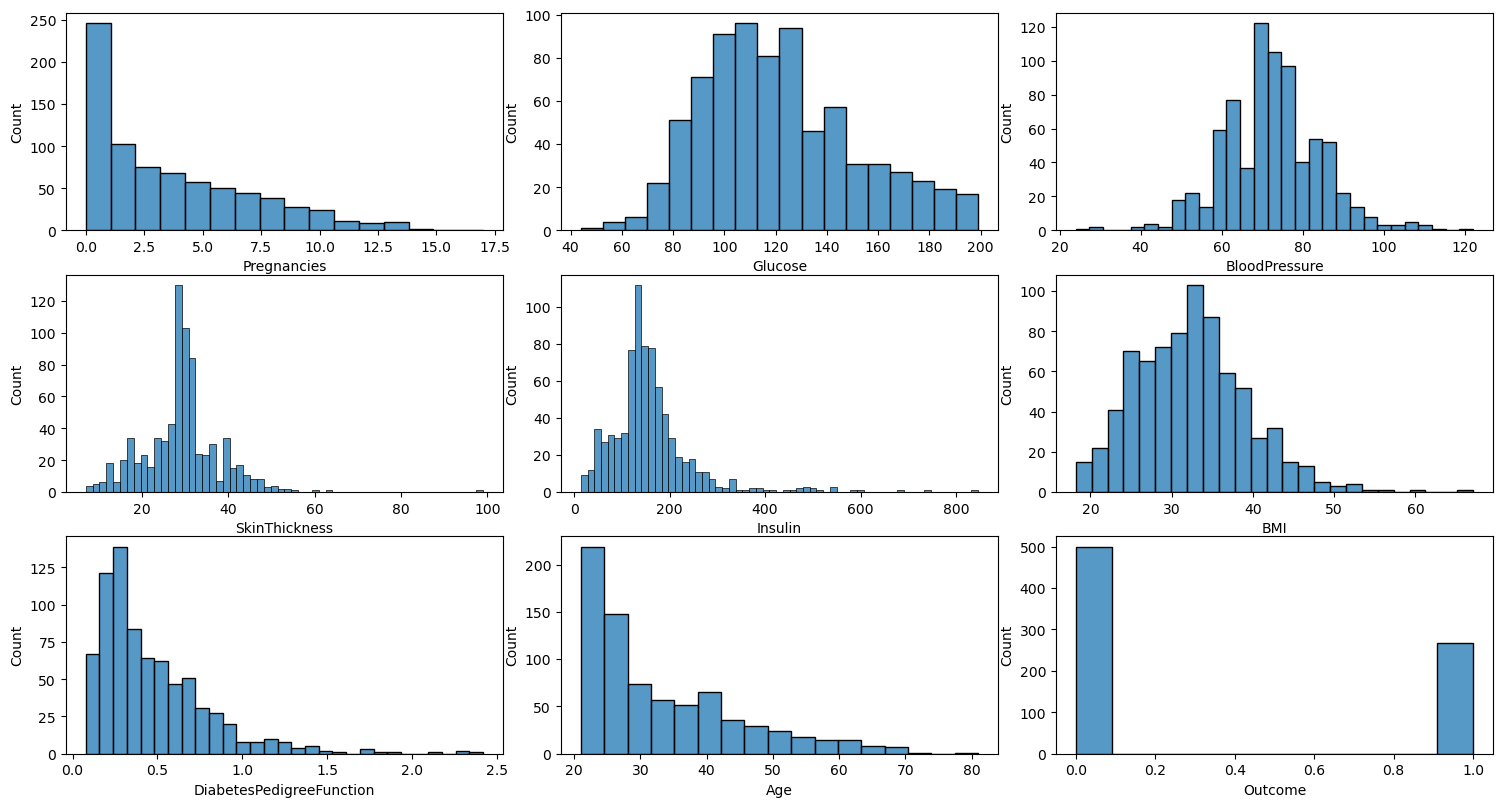

In [9]:
fig, axes = plt.subplots(3,3, figsize = (15,8))
#factors_df = df.drop(["Outcome"], axis = 1)
plt.tight_layout()
for j, i in enumerate(df.columns.tolist()):
    x= j%3
    y= j//3 
    sns.histplot(ax= axes[y, x],
                 x= df[i])
    
plt.show()

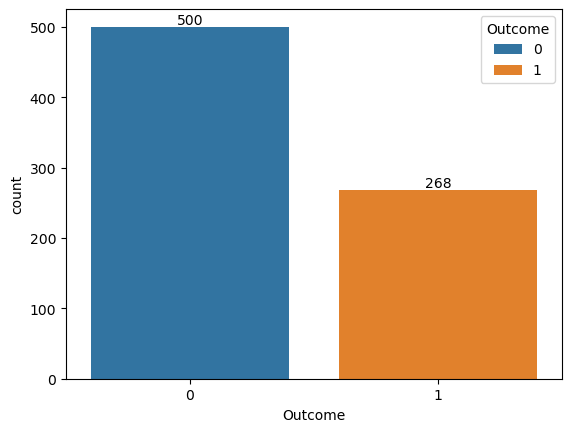

In [10]:
ax = sns.countplot(x='Outcome', hue='Outcome', data=df)
for container in ax.containers:
    ax.bar_label(container)

<Axes: >

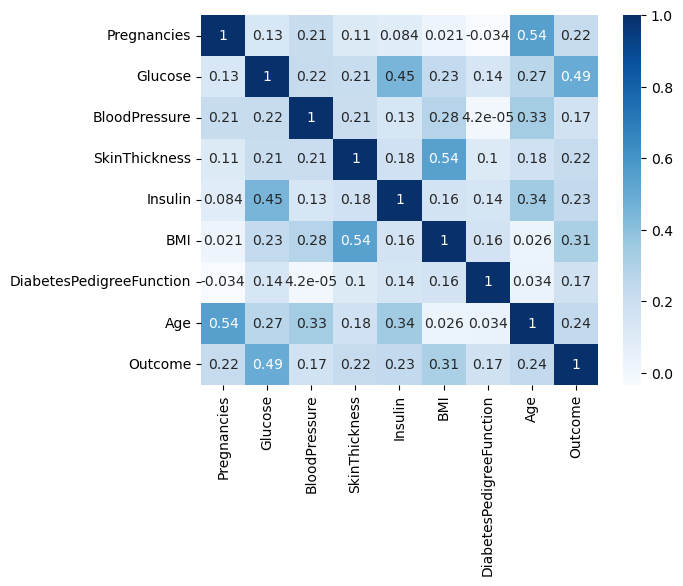

In [12]:
# calculate the correlation matrix on the numeric columns
corr = df.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr, annot= True, cmap="Blues")

Text(0.5, 1.0, 'DiabetesPedigreeFunction')

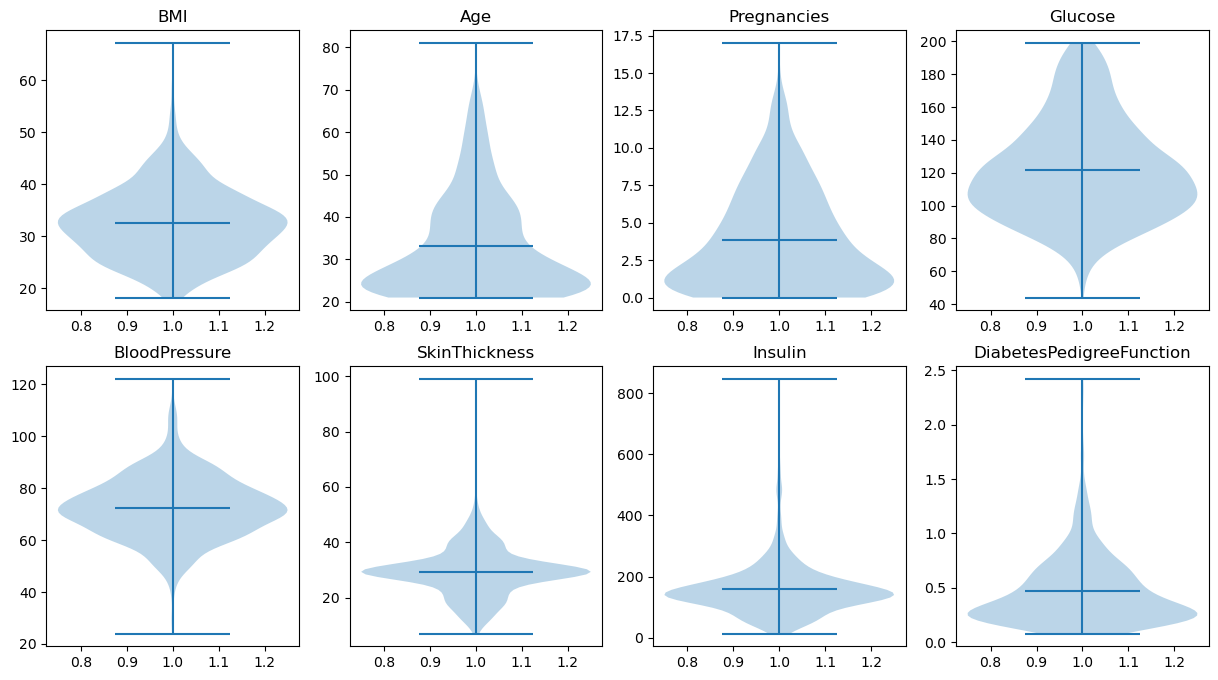

In [13]:
figure, axis = plt.subplots(2, 4, figsize = (15,8)) 
  
axis[0, 0].violinplot(df["BMI"], showmeans=True) 
axis[0, 0].set_title("BMI") 
  
axis[0, 1].violinplot(df["Age"], showmeans=True)  
axis[0, 1].set_title("Age") 

axis[0, 2].violinplot(df["Pregnancies"], showmeans=True)  
axis[0, 2].set_title("Pregnancies") 

axis[0, 3].violinplot(df["Glucose"], showmeans=True)  
axis[0, 3].set_title("Glucose") 

axis[1, 0].violinplot(df["BloodPressure"], showmeans=True)  
axis[1, 0].set_title("BloodPressure") 

axis[1, 1].violinplot(df["SkinThickness"], showmeans=True)  
axis[1, 1].set_title("SkinThickness") 

axis[1, 2].violinplot(df["Insulin"], showmeans=True)  
axis[1, 2].set_title("Insulin") 

axis[1, 3].violinplot(df["DiabetesPedigreeFunction"], showmeans=True)  
axis[1, 3].set_title("DiabetesPedigreeFunction") 

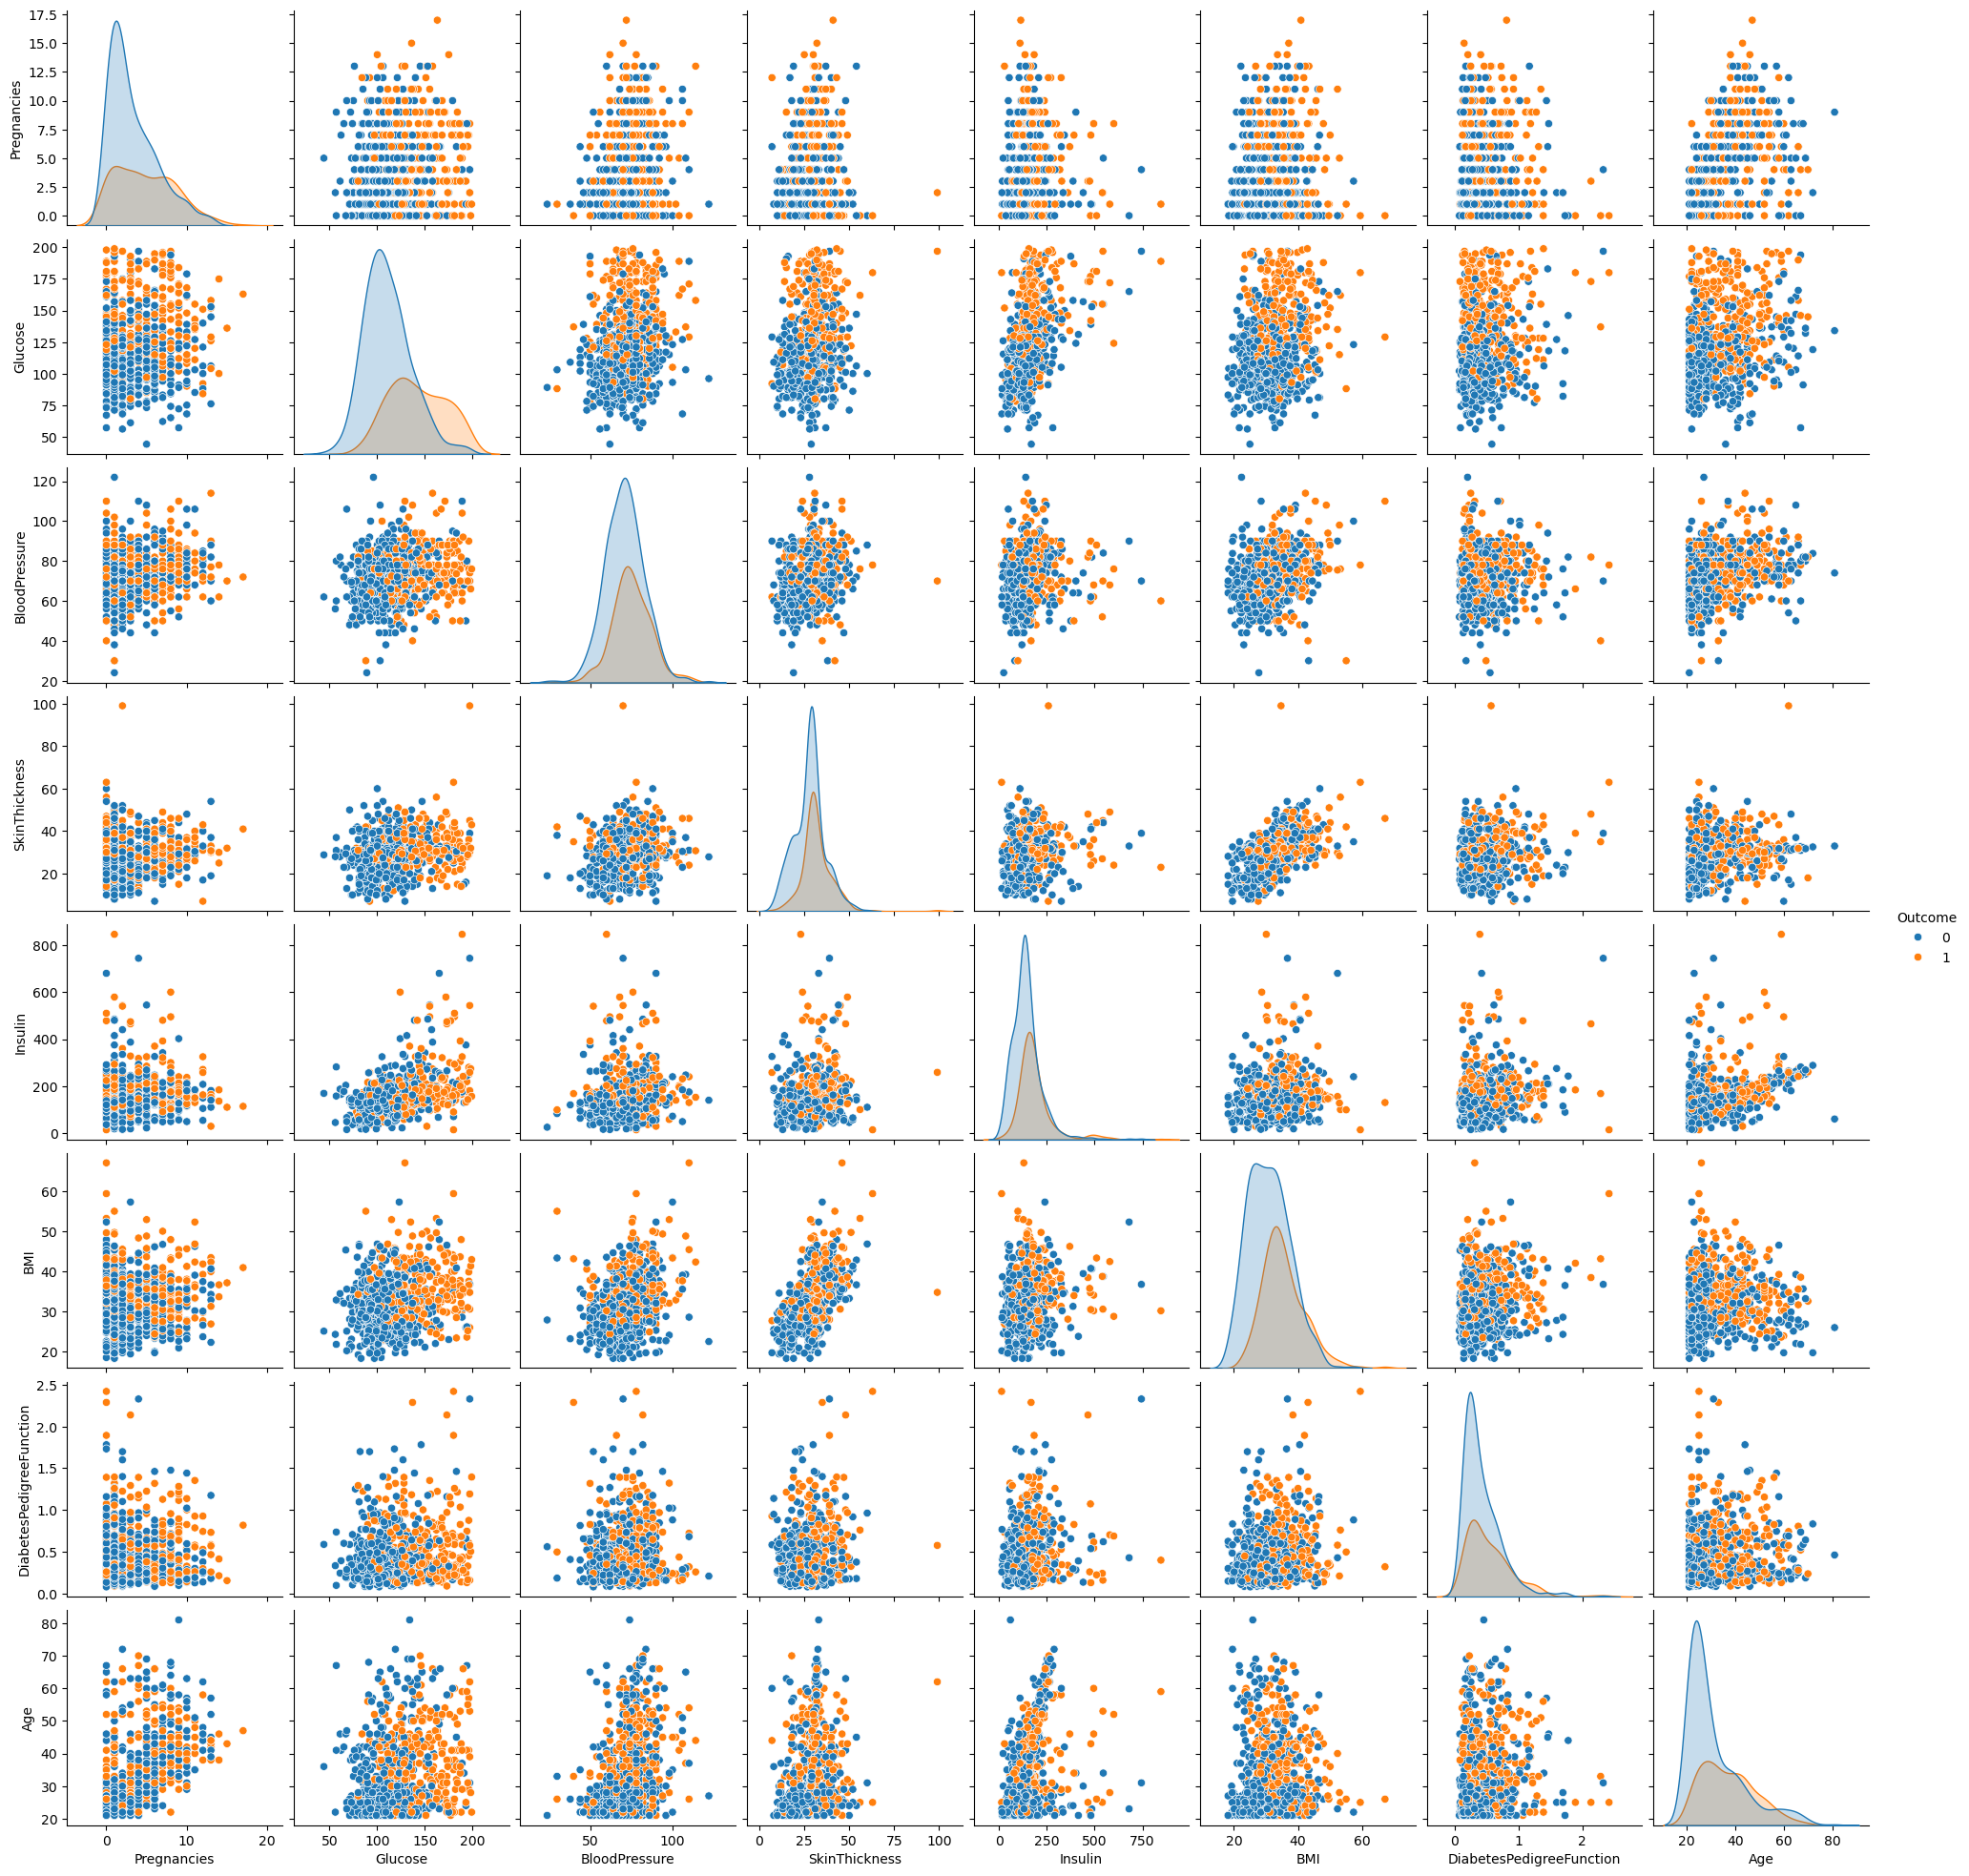

In [14]:
sns.pairplot(df,hue='Outcome')

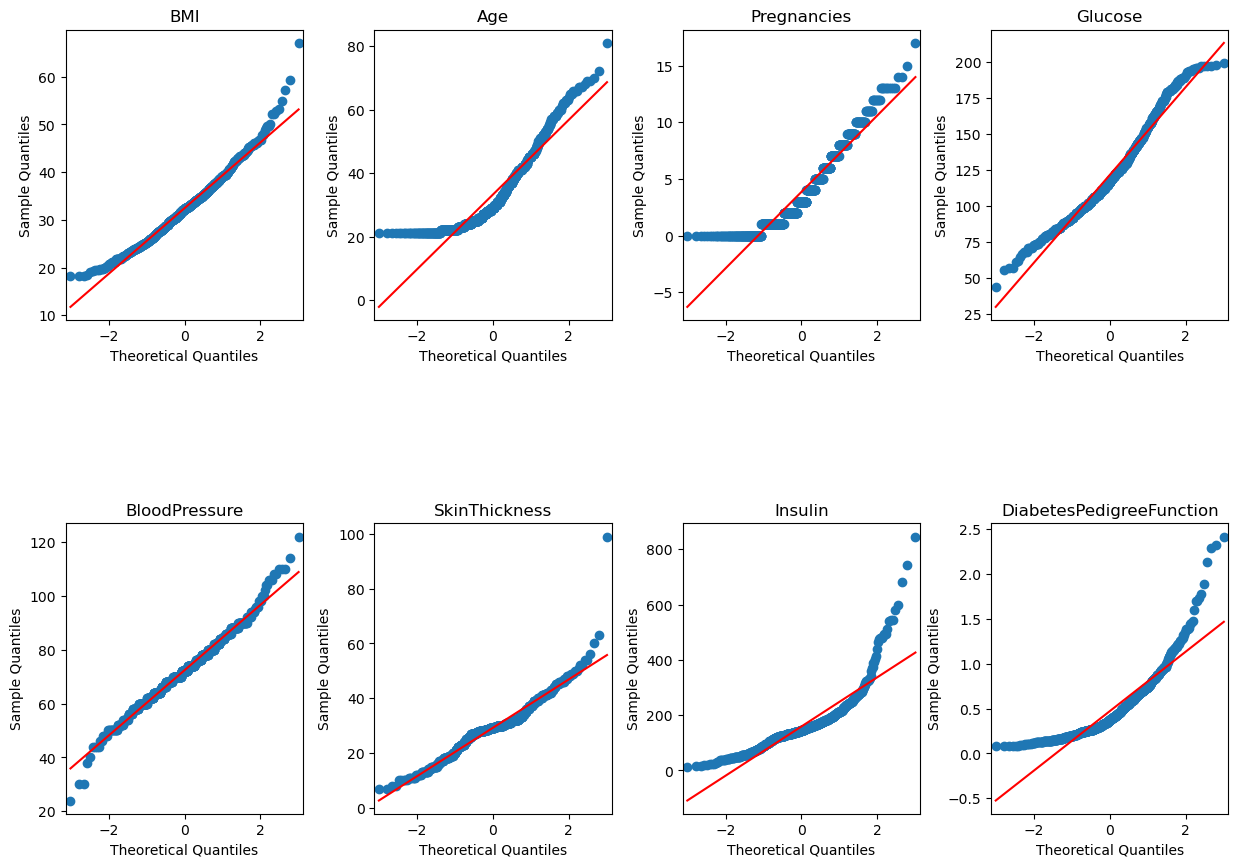

In [15]:
figure, axis = plt.subplots(2, 4, figsize = (15,8)) 

import statsmodels.api as sm
sm.qqplot(df['BMI'],ax = axis[0, 0], line = "s")
axis[0, 0].set_title("BMI")

sm.qqplot(df['Age'],ax = axis[0, 1], line = "s")
axis[0, 1].set_title("Age")

sm.qqplot(df['Pregnancies'],ax = axis[0, 2], line = "s")
axis[0, 2].set_title("Pregnancies")

sm.qqplot(df['Glucose'],ax = axis[0, 3], line = "s")
axis[0, 3].set_title("Glucose")

sm.qqplot(df['BloodPressure'],ax = axis[1, 0], line = "s")
axis[1, 0].set_title("BloodPressure")

sm.qqplot(df['SkinThickness'],ax = axis[1, 1], line = "s")
axis[1, 1].set_title("SkinThickness")

sm.qqplot(df['Insulin'],ax = axis[1, 2], line = "s")
axis[1, 2].set_title("Insulin")

sm.qqplot(df['DiabetesPedigreeFunction'],ax = axis[1, 3], line = "s")
axis[1, 3].set_title("DiabetesPedigreeFunction")

plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.7, wspace=0.3)